<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Imad/Charlotte311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://www.commonapp.org/static/90a1fb37e395b1adc32f28236052d416/university-north-carolina-charlotte_959.jpg'>



## PROJECT: Charlotte 311 Service Requests
## DSBA 6162


In [3]:
# Import Numpy
import numpy as np

# Import Pandas
import pandas as pd

# Import Random
import random

# to read and visualize spatial data
# ! pip install geopandas
import geopandas as gpd

# ! pip install contextily
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# Import Seaborn for plotting
import seaborn as sns

plt.style.use('ggplot')


     |████████████████████████████████| 19.3 MB 1.2 MB/s 


### 1) Importing the data file from Google drive.

In [4]:
# Import Data

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/Service_Requests_311.csv')


### 2) Taking a look at the our data

In [6]:
# Taking a look at the data
df.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [ ]:
# More exploration
# Lets take a look at how each variable is stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION               45672 non-null    object 
 1

In [ ]:
# Lets check the Value Counts
df['REQUEST_TYPE'].value_counts().head(30).sort_values(ascending=False)

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       6956
STREET SWEEPING/FLUSHING       6824
GRAFFITI                    

In [ ]:
df['REQUEST_TYPE'].unique().tolist()

['NON_RECYCLABLE ITEMS',
 'UTILITY VERIFICATION LTR',
 'MISSED RECYCLING',
 'CITIZEN FEEDBACK',
 'CWP REQUEST',
 'RECYCLABLE ITEMS',
 'CART REPAIR-GARBAGE',
 '311 DOCUMENT',
 'HNS HEALTH AND SANITATION',
 'ZON DAYCARE/CHILDCARE INQ',
 'CDOT STREETLIGHT REPAIR',
 'ZON SIGNS INQUIRY',
 'CART ISSUE/MISSING CART',
 'CART(S) DEL- NEW BUILD',
 'CART REPAIR-RECYCLE',
 'CDOT STREET SIGN REP/REPL',
 'SW DOCUMENT BULKY ITEMS',
 'TIRES',
 'LANDSCAPE TREES',
 'CART DELIVERY RECYCLING',
 'TAX BILL INQUIRY',
 'CART PURCHASE 2ND-GARBAGE',
 'FIELD OBSERVED PROBLEM',
 'SW DOCUMENT YARD WASTE',
 'LITTER/DEBRIS IN STREET',
 'SWS CART SHIPMT REVIEW',
 'ZONGROUP/BOARDING HOMES',
 'INVALID/NEW SW ADDRESS',
 'FLOODING',
 'SW DOCUMENT GARBAGE',
 'DEAD ANIMAL COLLECTION',
 'SW DOCUMENT RECYCLING',
 'ZON RESIDENTIAL PERMITS',
 'INVESTIGATE/CONTACT RECY',
 'HNS HOUSING',
 'CART ONLY DELIVER-GARB',
 'CART PURCHASE 2ND-RECYCLE',
 'CDOT TRAF SIGNAL TIMING',
 'CART PICKUP-RECYCLE',
 '3-1-1 ESCALATION REQUEST',
 'CDO

In [ ]:
df2 = df[['RECEIVED_DATE', 'DEPARTMENT', 'REQUEST_TYPE', 'CMPD_DIVISION', 'ZIP_CODE']]


<AxesSubplot:>

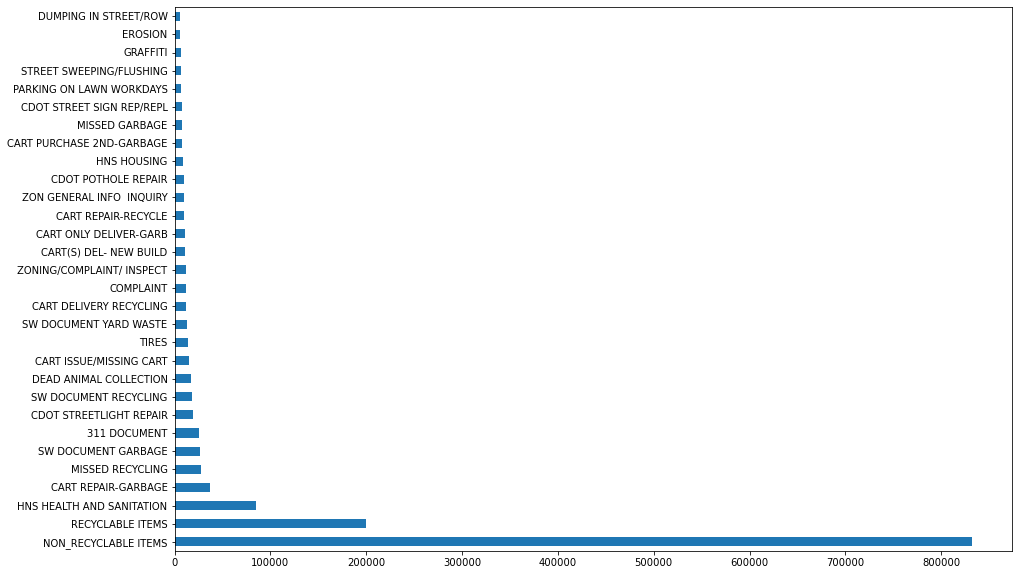

In [ ]:
# create barplot
df['REQUEST_TYPE'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

<AxesSubplot:>

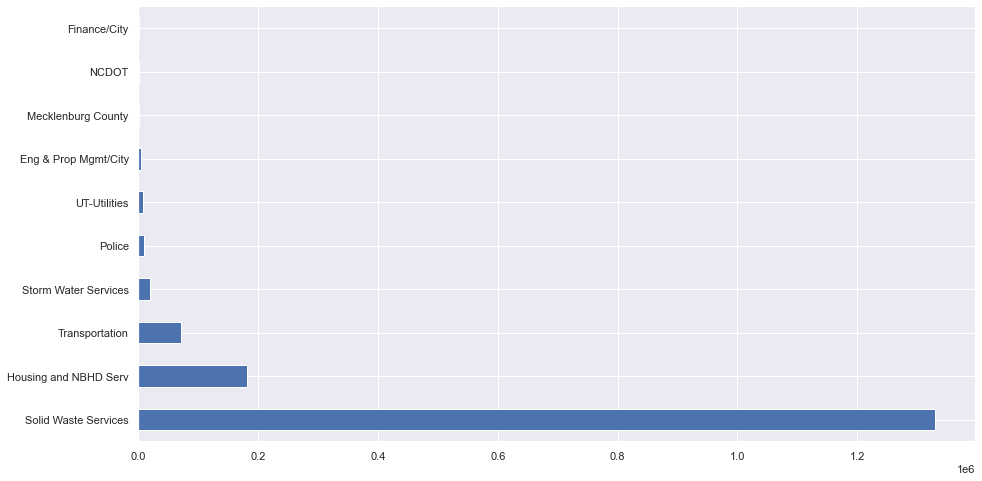

In [ ]:
# create barplot
df['DEPARTMENT'].value_counts().head(10).plot(kind='barh', figsize=(15,8))

<AxesSubplot:>

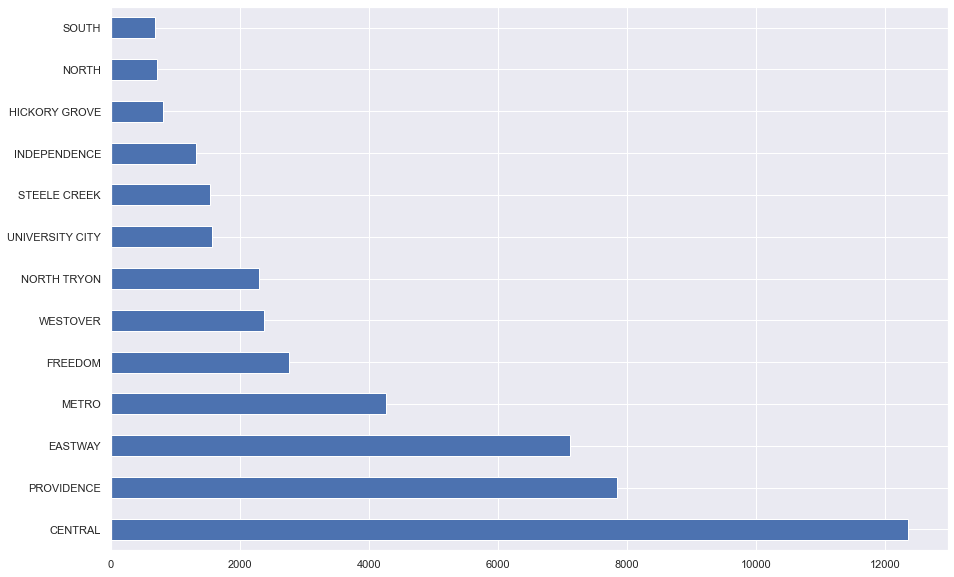

In [ ]:
# create barplot
df['CMPD_DIVISION'].value_counts().head(30).plot(kind='barh', figsize=(15,10))